# Modelo 4 Decision Tree con todas las variables

### Carga y división de datos

In [10]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [11]:
# Carga de datos
df_impagos = pd.read_csv('../Datos/Crudos/Loan_default.csv')
df_impagos.drop(columns=['LoanID'], inplace=True)
df_impagos.sample(5)

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
240147,30,136406,158590,500,114,4,18.78,48,0.69,Master's,Part-time,Single,No,Yes,Education,Yes,0
141864,66,117696,80474,480,24,4,13.23,36,0.42,Master's,Unemployed,Married,No,Yes,Auto,No,0
203570,37,147969,91012,590,51,4,20.68,60,0.79,Bachelor's,Unemployed,Divorced,Yes,Yes,Other,Yes,0
121445,18,97594,72220,614,12,2,14.16,12,0.15,High School,Self-employed,Divorced,Yes,Yes,Auto,No,0
133937,21,16915,213715,717,55,4,11.91,48,0.41,Master's,Self-employed,Single,Yes,No,Business,Yes,1


In [12]:
# División de los datos
X = df_impagos.drop(columns=['Default'])
y = df_impagos.Default

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creación de pipeline

In [13]:
# Dividir columnas categóricas
columnas_categoricas = X.select_dtypes(include='object').columns.to_list()

# Preprocesador con OneHotEncoder
preprocesador = ColumnTransformer(transformers=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), columnas_categoricas)
    ], remainder='passthrough'
)

In [15]:
# Pipeline
pipeline = Pipeline(steps=[
    ('preprocesamiento', preprocesador),
    ('modelo', DecisionTreeClassifier(random_state=42))
    ]
)

In [19]:
# Malla de Hiperparámetros
malla_hp = {
    'modelo__max_depth' : [None, 2, 5, 10],
    'modelo__criterion': ['gini', 'entropy'],
    'modelo__max_depth': [None, 5, 10, 20],
    'modelo__min_samples_split': [2, 5, 10],
    'modelo__min_samples_leaf': [1, 2, 4]
}

In [20]:
grid = GridSearchCV(
    estimator=pipeline,
    param_grid=malla_hp,
    scoring='accuracy',
    cv=5,
    n_jobs=-1)

In [21]:
grid.fit(X_train, y_train)

c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocesamiento',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['Education',
                                                                          'EmploymentType',
                                                                          'MaritalStatus',
                                                                          'HasMortgage',
                                                                          'HasDependents',
                                                                          'LoanPurpose',
                                                                          'HasCoSigner'])])),
                                       ('modelo',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'modelo__criterion': ['gini', 'entropy'],
                         'modelo__max_depth': [None, 5, 10, 20],
                         'modelo__min_samples_leaf': [1, 2, 4],
                         'modelo__min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
print(f'Parámetros: {grid.best_params_}')
print(f'Score: {grid.best_score_}')

modelo_tree = grid.best_estimator_

Parámetros: {'modelo__criterion': 'entropy', 'modelo__max_depth': 5, 'modelo__min_samples_leaf': 1, 'modelo__min_samples_split': 2}
Score: 0.8848340043443086


In [27]:
# Entrenamiento
modelo_tree.fit(X_train, y_train)
y_train_pred = modelo_tree.predict(X_train)
y_test_pred = modelo_tree.predict(X_test)

### Evaluación del modelo

In [28]:
# Cálculo de accuracy train
train_accuracy = accuracy_score(y_train, y_train_pred)

# Cálculo de accuracy train
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Accuracy train:', train_accuracy)
print('Accuracy test:', test_accuracy)

Accuracy train: 0.8850577927963209
Accuracy test: 0.8844200770184714


In [29]:
# Reporte de clasificación
reporte = classification_report(y_test, y_test_pred)
print(reporte)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     67681
           1       0.60      0.02      0.04      8924

    accuracy                           0.88     76605
   macro avg       0.74      0.51      0.49     76605
weighted avg       0.85      0.88      0.83     76605



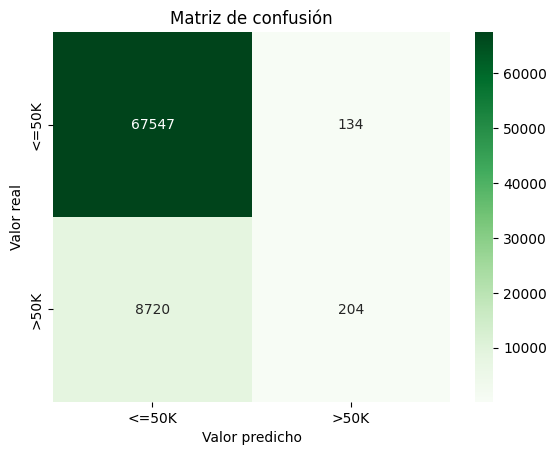

In [31]:
# Matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matriz_confusion, annot=True, fmt='d', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'], cmap='Greens')
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.title("Matriz de confusión")
plt.show();